# The extended Lorenz-84 model

The extended Lorenz-84 model given by

```{math}
:label: eq:Lorenz84
\begin{cases}
\begin{aligned}
\dot{X} &=-Y^{2}-Z^{2}-\alpha X+\alpha F-\xi U^{2}, \\
\dot{Y} &=X Y-\beta X Z-Y+G, \\
\dot{Z} &=\beta X Y+X Z-Z, \\
\dot{U} &=-\delta U+\xi U X+S.
\end{aligned}
\end{cases}
```

Here $X$ models the intensity of a baroclinic wave, $Y$ and $Z$ the sin and cos
coefficients of the wave respectively, the variable $U$ is added to study the
influence of external parameters such as temperature.  In this model all
codimension two bifurcation points of equilibria are present, see
{cite}`Kuznetsov@2008,Veen@2003,Nicolis@1995`.  We fix the parameters as
follows $\alpha=0.25, \beta=1, G=0.25, \delta=1.04$ and $\xi=0.987$. The
continuation parameters are $F$ and $S$.

## Overview

In this demo we will

- Define a numerically derive Bogdanov-Takens point.
- Start continuation of the homoclinic branch emanating from the
  Bogdanov-Takens points in two parameters $(F,S)$ using the new homoclinic
  smooth orbital predictor from {cite}`Bosschaert@2021`.
- Compare the predicted and computed homoclinic bifurcation curve emanating
  from the Bogdanov-Takens point in parameters space.
- Compare a range of predictors for the homoclinic solutions emanating from the
  Bogdanov-Takens point with the corrected homoclinic solutions curve in
  phase-space.
- Create a convergence plot of the different homoclinic approximations
  derived in {cite}`Bosschaert@2021`.

## Load MatCont

Before we can start using __MatCont__ we need to add the main directory of
__MatCont,__ as well as various subdirectories of __MatCont,__ to the _MATLAB
search path_. This is done in the code below. The variable `matcont_home`
should point to the main directory of __MatCont.__

In [1]:
clear all
restoredefaultpath
matcontpath = '../../';
addpath(matcontpath)
addpath([matcontpath, 'Equilibrium'])
addpath([matcontpath, 'Systems'])
addpath([matcontpath, 'Hopf'])
addpath([matcontpath, 'Homoclinic'])
addpath([matcontpath, 'LimitPoint'])
addpath([matcontpath, 'LimitCycle'])
addpath([matcontpath, 'Continuer'])
addpath([matcontpath, 'MultilinearForms'])
addpath([matcontpath, 'Utilities'])
set(groot, 'defaultTextInterpreter', 'LaTeX');
set(0,'defaultAxesFontSize',15)

## Set the odefile

Next we set the variable `odefile` to the _system file_ previously generated by
the notebook [Lorenz84GenSym.ipynb](Lorenz84GenSym.ipynb). 

In [2]:
odefile=@extendedLorenz84;

## Define Bogdanov-Takens point manually

By numerically solving for real equilibria of {eq}`eq:Lorenz84` with double zero
eigenvalues we obtain two equilibria. The first equilibrium is given by

$$
\begin{pmatrix}
  X \\Y \\Z \\U \\F \\S  
\end{pmatrix}
\approx
\begin{pmatrix}
1.225640495986278 \\ -0.036320793271068824 \\ 0.19728832311233313 \\
-0.12339001198518826 \\ 1.446716701115361 \\ 0.020940169683322466
\end{pmatrix},
$$

while the second is obtained from the symmetry 
\[
    (X,Y,Z,U,F,S) \mapsto (X,Y,Z,-U,F,-S)
.\]   

Thus we can explicitly define the Bogdanov-Takens point

In [3]:
X = 1.225640495986278;
Y = -0.036320793271068824;
Z = 0.19728832311233313;
U = -0.12339001198518826;
F = 1.446716701115361;
S = 0.020940169683322466;
bt1.x = [X; Y; Z; U];
bt1.par = [F; S];

To refer to the parameters throughout the script we create a __cell array__ of
strings containing the parameter names. This is then converted into a
__struct__. This allows us to refer to the parameters as `ind.parametername`,
similar as done in _DDE-BifTool_.

In [4]:
parnames = {'F', 'S'};
cind = [parnames;num2cell(1:length(parnames))];
ind  = struct(cind{:});

## Continue homoclinic curve emanating from the Bogdanov-Takens point

To continue the homoclinic curve emanating from the Bogdanov-Takens point we
use the functions `BT_Hom_set_options` and `init_BT_Hom` to obtain an initial
approximation to the homoclinic solution (`hom_x`) as well as a tangent vector
to the discretized homoclinic solution (`hom_v`) as described in
{ref}`initial-prediction-Homoclinic-orbit`. 

In [5]:
ap = [ind.F, ind.S];
BToptions = BT_Hom_set_options();
[hom_x, hom_v] = init_BT_Hom(odefile, bt1,  ap, BToptions);
opt = contset;
opt.Singularities = 0;
homoclinic_br1 = cont(@homoclinic, hom_x, hom_v, opt);

BT normal form coefficients:
a=2.144234e-01,	 b=6.065146e-01
The initial perturbation parameter epsilon:  1.000000e-01
The initial amplitude: 0.0349736
The initial half-return time T: 116.985
The initial distance time eps0: 1.96422e-05
The initial distance time eps1: 6.35711e-05
first point found
tangent vector to first point found
Current step size too small (point 43)
elapsed time  = 5.7 secs
npoints curve = 43


## Compare predicted with computed parameters

Now that we have obtained a curve of homoclinic orbits (`homoclinic_br`) we
compare the computed curve in parameter space with the predicted curve we
construct below. To do so, we use the function `BT_nmfm_orbital` to obtain the
smooth orbital normal form coefficients, i.e. $a$ and $b$, and the coefficients
of the transformation $K$ between the parameters of the system and the parameters
of the smooth orbital normal form on the center manifold, see
{cite}`Bosschaert@2021`.

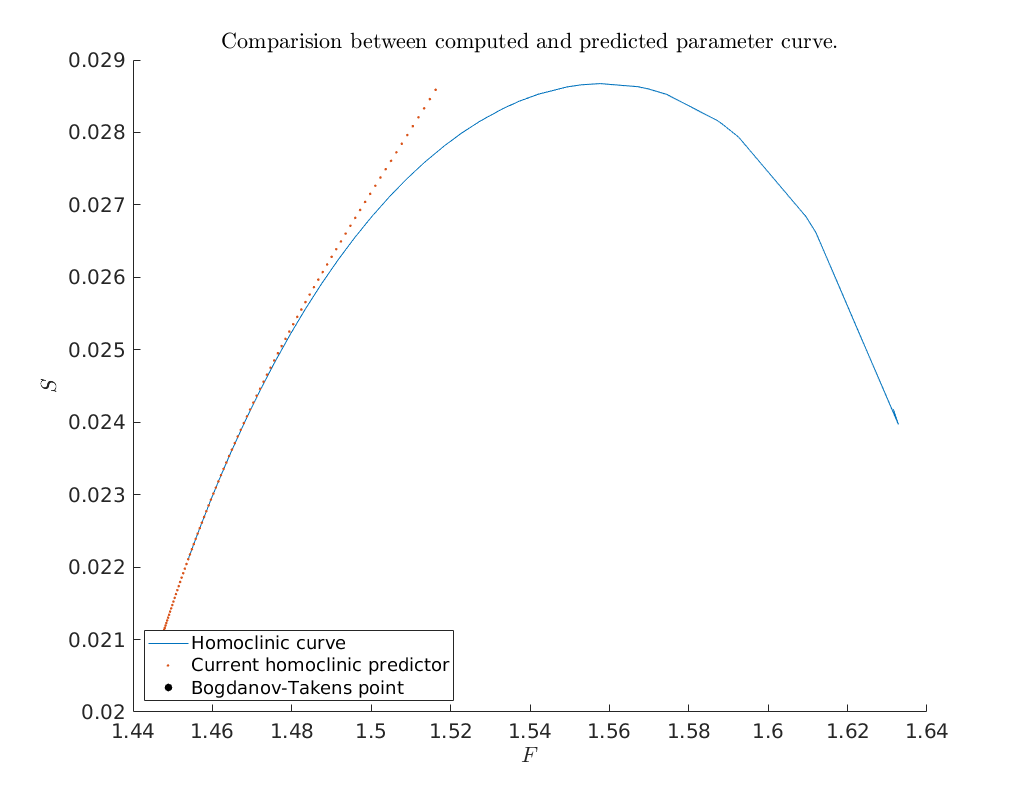

In [6]:
%plot --width 1024 --height 800
hold on
global homds
% plot computed parameter curve
plot(homoclinic_br1(homds.PeriodIdx+1,:), ...
     homoclinic_br1(homds.PeriodIdx+2,:));
% Bogdanov-Takens parameter-dependent normal form coefficients
bt1 = BT_nmfm_orbital(odefile, bt1, ap);
a   = bt1.nmfm.a;
b   = bt1.nmfm.b;
K10 = bt1.nmfm.K10;
K01 = bt1.nmfm.K01;
K02 = bt1.nmfm.K02;
K11 = bt1.nmfm.K11;
K03 = bt1.nmfm.K03;
% construct predictor as in the paper
eps = linspace(0, 0.3);
beta1 = -4*a^3/b^4*eps.^4;
tau0  = 10/7;
tau2  = 288/2401;
beta2 = a/b*(tau0 + tau2*eps.^2).*eps.^2;
alpha = K10.*beta1 + K01.*beta2 + 1/2*K02.*beta2.^2 ...
    + K11.*beta1.*beta2 + 1/6*K03.*beta2.^3;
alpha = bt1.par(ap) + alpha;
% plot currect predictor
plot(alpha(1,:), alpha(2,:), '.', 'LineWidth', 8)
% plot Bogdanov-Takens point
plot(bt1.par(ind.F), bt1.par(ind.S), '.k', 'MarkerSize', 20)
% set axis labels and legend
xlabel('$F$')
ylabel('$S$')
legend({'Homoclinic curve', 'Current homoclinic predictor', ...
    'Bogdanov-Takens point'}, 'Location', 'SouthWest')
title('Comparision between computed and predicted parameter curve.')

(Lorenz-continued-homoclinic-solutions-phase-space)= 
## Plot of continued homoclinic solutions in $(X,Y,Z)$ phase-space

To obtain an impression of the  homoclinic solutions we plot the computed
homoclinic orbits in $(X,Y,Z)$ phase-space.

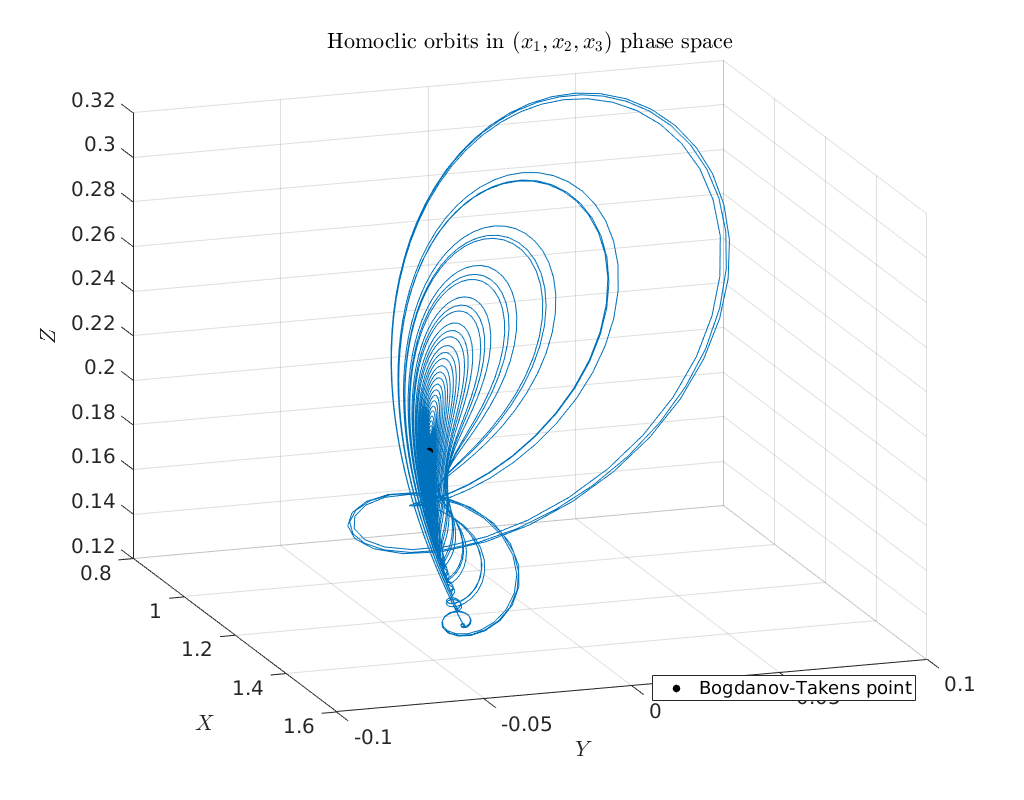

In [7]:
hold on
plot3(homoclinic_br1(homds.coords(1:homds.nphase:end), 1:end), ...
      homoclinic_br1(homds.coords(2:homds.nphase:end), 1:end), ...
      homoclinic_br1(homds.coords(3:homds.nphase:end), 1:end), ...
     'Color', [0 0.4470 0.7410], 'HandleVisibility', 'Off')
xlabel('$X$')
ylabel('$Y$')
zlabel('$Z$')
plot3(bt1.x(1), bt1.x(2), bt1.x(3), '.k' ,'MarkerSize', 20)
legend('Bogdanov-Takens point', 'Location', 'SouthEast')
title('Homoclic orbits in $(x_1,x_2,x_3)$ phase space')
grid on
view([71, 20]);

### Predictors of orbits for various epsilons

Below we compute for a range of amplitudes the predicted and corrected
homoclinic solutions and compare them in phase space. As seen from the plot
[above](Lorenz-continued-homoclinic-solutions-phase-space) the homoclinic
solutions start to deform rather quickly. Therefore, we cannot expect the
approximation to be accurate for relative large amplitude values. Still, for
an amplitude of $0.3$ the approximation is nearby the corrected homoclinic
solutions.

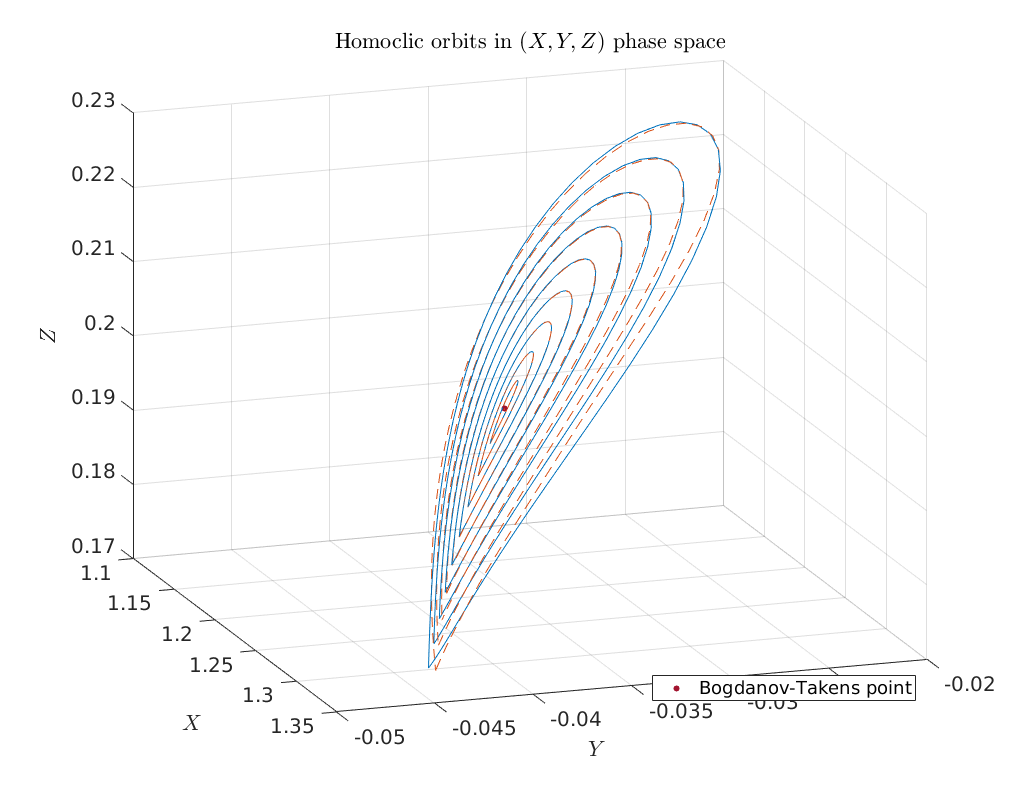

In [8]:
options = BT_Hom_set_options();
options.messages = false;
options.correct = false;
options.TTolerance = 1.0e-05;

amplitudes = linspace(1.0e-03, 0.3, 10);
XPredicted = zeros(658,length(amplitudes));
XCorrected = zeros(658,length(amplitudes));
for j=1:length(amplitudes)
  options.amplitude = amplitudes(j);
  [x_pred, v0] = init_BT_Hom(odefile, bt1, ap, options);
  XPredicted(:,j) = x_pred;
  try
    XCorrected(:,j) = newtcorr(x_pred, v0);
  catch
    warning('Didn''t convergence to homoclinic solution')
  end
end

hold on
cm = lines;
plot3(XPredicted(homds.coords(1:homds.nphase:end),1:10), ...
      XPredicted(homds.coords(2:homds.nphase:end),1:10), ...
      XPredicted(homds.coords(3:homds.nphase:end),1:10), ...
      'color', cm(1,:), 'HandleVisibility', 'Off')
plot3(XCorrected(homds.coords(1:homds.nphase:end),1:10), ...
      XCorrected(homds.coords(2:homds.nphase:end),1:10), ...
      XCorrected(homds.coords(3:homds.nphase:end),1:10), ...
      '--', 'color', cm(2,:), 'HandleVisibility', 'Off')
plot3(bt1.x(1), bt1.x(2), bt1.x(3), '.', 'MarkerSize', 16)
legend('Bogdanov-Takens point', 'Location', 'SouthEast')
title('Homoclic orbits in $(X,Y,Z)$ phase space')
xlabel('$X$')
ylabel('$Y$')
zlabel('$Z$')
grid on
view([71, 20]);

## Convergence plot

We finish this notebook with a log-log convergence plot comparing the different
third order homoclinic approximation methods derived in {cite}`Bosschaert@2021`
to approximate the homoclinic solutions near the first Bogdanov-Takens point.
On the abscissa is the amplitude $A_0$ and on the ordinate the relative error
$\delta$ between the constructed solution (`x_pred`) to the defining for the
homoclinic orbit and the Newton corrected solution (`x_corrected`).

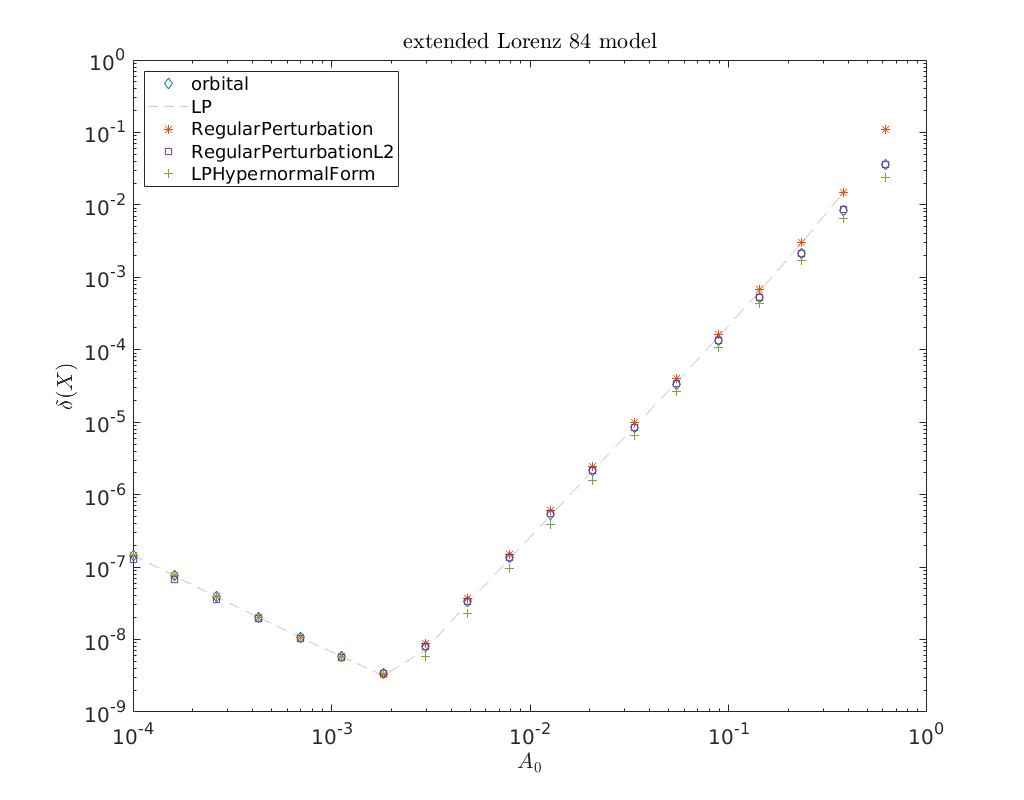

In [9]:
BToptions = BT_Hom_set_options();
BToptions.TTolerance = 1e-05;
BToptions.messages = false;
BToptions.correct = false;

amplitudes = logspace(-4, 0, 20);
methodList = {'orbital', 'LP', 'RegularPerturbation', ...
    'RegularPerturbationL2', 'LPHypernormalForm'};
relativeErrors = {};
for i=1:length(methodList)
    BToptions.method = methodList{i};
    relativeErrors{i} = zeros(size(amplitudes));
    for j=1:length(amplitudes)
    BToptions.amplitude = amplitudes(j);
    [x_pred, v0] = init_BT_Hom(odefile, bt1, ap, BToptions);
    try
        x_corrected = newtcorr(x_pred, v0);
        relativeErrors{i}(j) = norm(x_corrected-x_pred)/norm(x_corrected);
    catch
        warning('Did not converge.')
        continue
    end
  end
end

cm = lines();
loglog(amplitudes, relativeErrors{1}(:), 'd', ...
       amplitudes, relativeErrors{2}(:), '--', ...
       amplitudes, relativeErrors{3}(:), '*', ...
       amplitudes, relativeErrors{4}(:), 's', ...
       amplitudes, relativeErrors{5}(:), '+')
legend(methodList, 'Location', 'NorthWest')
title('extended Lorenz 84 model')
xlabel('$A_0$')
ylabel('$\delta(X)$')
ax = gca;
ax.ColorOrder = [cm(1,:); [0.8 0.8 0.8]; cm(2,:); cm(4,:); cm(5,:)];